In [2]:
library(data.table)
library(deldir)
library(ggplot2)
library(igraph)
library(rjson)

In [3]:
edge_list = read.csv("/Users/joannanavarro/Documents/GitHub/ee232e/project4/san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv", header = TRUE, sep = ",")
edge_table = as.data.table(edge_list)
edge_data = edge_table[month == 12][, c("sourceid", "dstid", "mean_travel_time")]
# 6:04am
# 6:05am
# takes 1 minute to load

In [4]:
json_data = fromJSON(file = "/Users/joannanavarro/Documents/GitHub/ee232e/project4/san_francisco_censustracts.json")
features = json_data$features

In [5]:
len = length(features)
len

[1] 2710

In [6]:
id_list = c()
x_list = c()
y_list = c()
dist_list = c()
loc_list = list()

for(i in 1:len){
    feature = features[[i]]
    dist_list = c(dist_list, feature$properties$DISPLAY_NAME)
    location = feature$geometry$coordinates
    location_list = split(unlist(location), 1:2)
    avg_x = mean(location_list[[1]])
    avg_y = mean(location_list[[2]])
    x_list = c(x_list, avg_x)
    y_list = c(y_list, avg_y)
    loc = c()
    loc = c(loc, avg_x)
    loc = c(loc, avg_y)
    loc_list[[i]] = loc
    id_list = c(id_list, feature$properties$MOVEMENT_ID)
}
g = graph.data.frame(d = edge_data, directed = FALSE)

In [7]:
id2dist = as.list(setNames(dist_list, id_list))
V(g)$DISPLAY = id2dist[V(g)$name]
id2x = as.list(setNames(x_list, id_list))
id2y = as.list(setNames(y_list, id_list))
V(g)$loc_x = id2x[V(g)$name]
V(g)$loc_y = id2y[V(g)$name]
id2loc = as.list(setNames(loc_list, id_list))
V(g)$loc = id2loc[V(g)$name]
g = simplify(g, remove.multiple = TRUE, edge.attr.comb = "mean" )
clusters = components(g)
gcc = induced.subgraph(g, which(clusters$membership == which.max(clusters$csize)))

In [8]:
path = "/Users/joannanavarro/Documents/GitHub/ee232e/project4/san_francisco-censustracts-2017-4-All-MonthlyAggregate.csv"
el = read.csv(path, header = TRUE, sep = ",") 
el[, 1] = as.character(el[, 1])
el[, 2] = as.character(el[, 2])
el = as.matrix(el)
g = graph.edgelist(el[, 1:2], directed = FALSE) 
E(g)$weight = as.numeric(el[, 3])

# 6:10am
# 6:11

In [9]:
el

sourceid,dstid,month,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
1982,73,12,350.59,230.08,311.46,1.56
2213,1523,12,872.92,383.89,803.50,1.49
438,433,12,2262.35,919.08,2144.34,1.35
448,333,12,1337.10,431.10,1277.05,1.35
1044,1015,10,690.68,282.61,634.03,1.58
1043,1025,10,1657.58,487.12,1600.12,1.29
2231,315,12,805.52,309.16,764.44,1.35
2202,605,12,1674.72,482.16,1614.37,1.30
2250,125,12,1549.98,423.04,1495.88,1.30
2465,3,10,3801.24,832.42,3723.47,1.22


In [10]:
id2street = as.list(setNames(as.character(loc_list), id_list))
id2coordinator_x = as.list(setNames(x_list, id_list))
id2coordinator_y = as.list(setNames(y_list, id_list))

In [11]:
V(g)$street_name = id2street[V(g)$name]
V(g)$loc_x = id2coordinator_x[V(g)$name]
V(g)$loc_y = id2coordinator_y[V(g)$name]

In [13]:
c = components(g)
gcc = induced.subgraph(g, which(c$membership == which.max(c$csize)))
vcount(gcc)
ecount(gcc)

[1] 1906

[1] 1651364

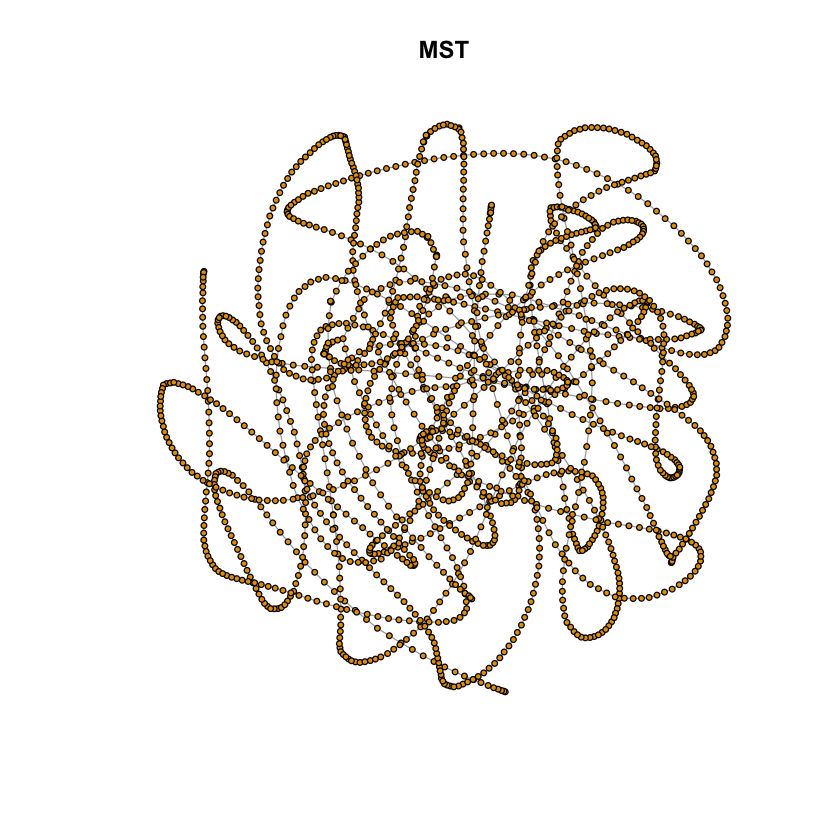

In [17]:
mst = mst(gcc, weights = E(gcc)$weight, algorithm="prim")
plot(mst, vertex.color = rep(1, vcount(gcc)), vertex.size = rep(2, vcount(gcc)), vertex.label = NA, main="MST")

In [25]:
adj_mat = as_adjacency_matrix(gcc, type = "both", attr = "weight")

In [26]:
iter = 0
count = 0
while(iter < 1000){
    v1 = sample(V(gcc), 1)[[1]]$name
    v2 = sample(V(gcc), 1)[[1]]$name
    v3 = sample(V(gcc), 1)[[1]]$name
    if(v1 != v2 && v2 != v3 && v1 != v3){
        a = adj_mat[v1,v2]
        b = adj_mat[v2,v3]
        c = adj_mat[v1,v3]
        if(a * b * c != 0){
            if((a > b + c) || (b > a + c) || (c > a + b)) count = count + 1
            iter = iter + 1
        }    
    }  
}
# start time: 7:53am
# end time: 8:02am

# Question 9

In [28]:
min_distance = function(graph, node1, node2){
    if(get.edge.ids(graph, c(node1, node2)) == 0){
        path = shortest_paths(graph, from = node1, to = node2, weights = E(graph)$weight)
        tot <- 0
        for(k in 1:(length(path$vpath[[1]]) - 1))
            tot <- tot + E(graph)[get.edge.ids(graph, c(path$vpath[[1]][k], path$vpath[[1]][k + 1]))]$weight
        return(tot)
    }
    else
        return (E(graph)[get.edge.ids(graph, c(node1, node2))]$weight)
}

In [29]:
dfs = dfs(graph = mst, root = V(mst)[1], order = TRUE, order.out = FALSE, father = FALSE)

In [30]:
dfs$order

+ 1906/1906 vertices, named, from 3e59e3d:
   [1] 1982 2574 586  94   1482 753  2589 2542 754  1219 852  1814 1963 1132
  [15] 1810 451  2383 2295 2568 1900 1150 1128 362  122  2282 2309 2493 1326
  [29] 1301 1786 2492 1322 1318 305  2444 1208 2306 2619 1785 1354 1789 1320
  [43] 969  911  2329 214  1715 231  1713 374  36   862  1405 1403 230  1719
  [57] 1717 793  1344 1238 2703 2549 1343 837  1350 2033 1230 583  330  973 
  [71] 1590 223  2186 329  485  1013 1636 2482 1645 893  2201 109  1515 613 
  [85] 2225 949  1510 1084 168  1095 1101 1096 939  2342 2275 638  2484 1637
  [99] 2192 1800 1621 2534 2666 2608 1610 1039 619  332  397  1478 296  440 
 [113] 1186 791  1192 800  12   2026 2415 849  1997 2399 2008 2010 2011 2073
 [127] 1313 777  2380 1290 2009 2004 1289 2014 1288 2071 2163 765  764  83  
+ ... omitted several vertices

In [31]:
g_tsp = make_empty_graph(n = vcount(gcc), directed = FALSE)
edge_weight = c()
node <- as.matrix(dfs$order)
distance = 0
for(i in 1:1879){
    g_tsp = add_edges(g_tsp, c(node[i], node[i+1]))
    weight = min_distance(gcc, node[i], node[i+1])
    distance = distance + weight
    edge_weight = c(edge_weight, weight)
}

g_tsp = add_edges(g_tsp, c(node[1], node[1880]))
weight = min_distance(gcc, node[1], node[1880])
distance = distance + weight
edge_weight = c(edge_weight, weight)

pseudo_optimal = sum(E(mst)$weight)
distance/pseudo_optimal
# start time: 6:50am
# end time: 6:59am

# 8:04 am
# 8:52 am

[1] 1.097194

# Question 10

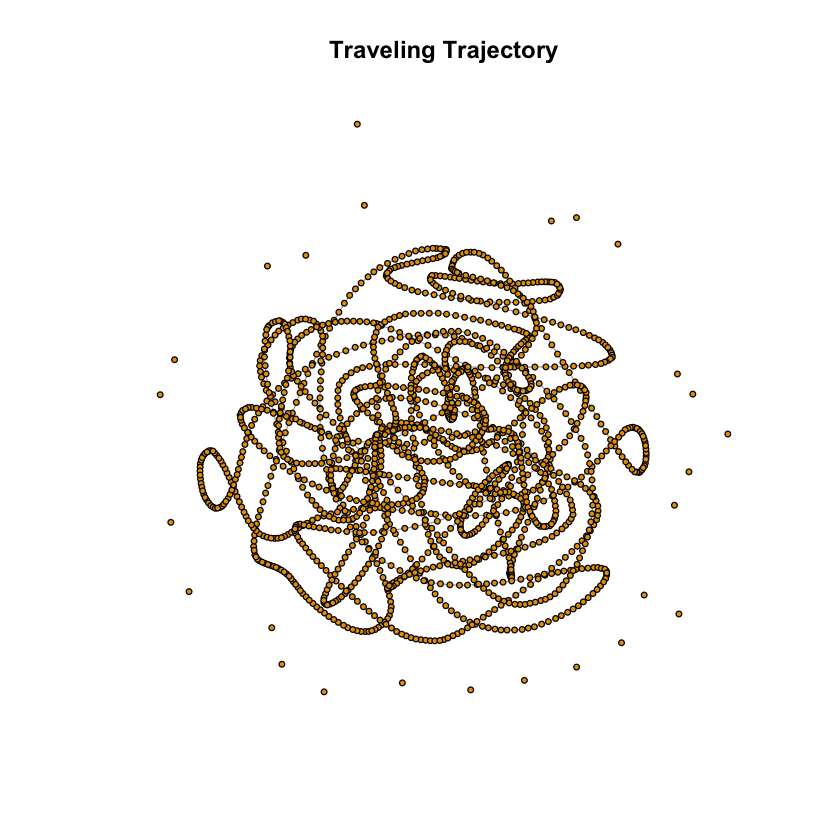

In [32]:
g_tsp = set_edge_attr(g_tsp, "weight", value = edge_weight)
x = c()
y = c()
for(i in 1:1880){
    x = c(x, as.numeric(V(mst)[node[i]]$loc_x))
    y = c(y, as.numeric(V(mst)[node[i]]$loc_y))
}
coordinate = data.frame(X = x, Y = y)
coordinate = as.matrix(coordinate)

plot(g_tsp, vertex.color = rep(1, vcount(gcc)), vertex.size = rep(2, vcount(gcc)), vertex.label = NA, main = "Traveling Trajectory")

# Question 11

In [33]:
temps <- json_data$features
l <- length(temps)
print(l)

display_temp <- c()
x_temp <- c()
y_temp <- c()
movement_id_temp <- c()
location_temp <- list()

for(i in 1:l){
    temp = temps[[i]]
    display_temp <- c(display_temp, temp$properties$DISPLAY_NAME)
    location <- temp$geometry$coordinates
    location2 <- split(unlist(location), 1:2)
    x_ave = mean(location2[[1]])
    y_ave = mean(location2[[2]])
    x_temp <- c(x_temp,x_ave)
    y_temp <- c(y_temp,y_ave)
    location3 <- c()
    location3 <- c(location3, x_ave)
    location3 <- c(location3, y_ave)
    location_temp[[i]] <- location3
    movement_id_temp <- c(movement_id_temp, temp$properties$MOVEMENT_ID)
}
g <- graph.data.frame(d = edge_data, directed = FALSE)

print(g)
print(vcount(g))
print(ecount(g))

display <- as.list(setNames(display_temp, movement_id_temp))
xtemp <- as.list(setNames(x_temp, movement_id_temp))
ytemp <- as.list(setNames(y_temp, movement_id_temp))
location4 <- as.list(setNames(location_temp, movement_id_temp))

V(g)$DISPLAY_NAME <- display[V(g)$name]
V(g)$x1 <- xtemp[V(g)$name]
V(g)$y1 <- ytemp[V(g)$name]
V(g)$LOCATION <- location4[V(g)$name]
g <- simplify(g, remove.multiple = TRUE, edge.attr.comb = "mean")
temp1 <- components(g)
gcc <- induced.subgraph(g, which(temp1$membership == which.max(temp1$csize)))

print(gcc)
print(vcount(gcc))
print(ecount(gcc))
print(E(gcc))

[1] 2710
IGRAPH 905c596 UN-- 1905 555265 -- 
+ attr: name (v/c), mean_travel_time (e/n)
+ edges from 905c596 (vertex names):
 [1] 1982--73   2213--1523 438 --433  448 --333  2231--315  2202--605 
 [7] 2250--125  1762--1728 1760--1748 1743--1918 1750--1848 1770--1648
[13] 1781--1538 1690--2448 1691--2438 97  --624  83  --764  87  --724 
[19] 77  --824  2344--2117 2403--1527 2312--2437 64  --954  1499--964 
[25] 98  --614  2451--1047 91  --684  2340--2157 76  --834  2315--2407
[31] 2694--2691 2349--1087 2348--1097 2209--2487 918 --2408 937 --2218
[37] 927 --2318 808 --275  818 --175  816 --195  2490--917  91  --675 
[43] 676 --81   678 --61   2022--1417 309 --2233 403 --1293 315 --2173
+ ... omitted several edges
[1] 1905
[1] 555265
IGRAPH 4fb78f9 UN-- 1898 320916 -- 
+ attr: name (v/c), DISPLAY_NAME (v/x), x1 (v/x), y1 (v/x), LOCATION
| (v/x), mean_travel_time (e/n)
+ edges from 4fb78f9 (vertex names):
 [1] 1982--2213 1982--2202 1982--1743 1982--1781 1982--98   1982--2209
 [7] 1982--808

In [34]:
name1 <- V(gcc)[which(V(gcc)$DISPLAY_NAME == '100 Campus Drive, Stanford')]$name
location1 <- V(gcc)[which(V(gcc)$DISPLAY_NAME == '100 Campus Drive, Stanford')]$LOCATION
name2 <- V(gcc)[which(V(gcc)$DISPLAY_NAME == '700 Meder Street, Santa Cruz')]$name
location2 <- V(gcc)[which(V(gcc)$DISPLAY_NAME == '700 Meder Street, Santa Cruz')]$LOCATION

print(name1)
print(location1)
print(name2)
print(location2)

print(vcount(gcc))

[1] "2607"
[[1]]
[1] -122.17598   37.42969

[1] "1968"
[[1]]
[1] -122.06456   36.97417

[1] 1898


In [35]:
x <- c()
y <- c()
for(i in 1:vcount(gcc)){
    x <- c(x, V(gcc)[i]$LOCATION[[1]][1])
    y <- c(y, V(gcc)[i]$LOCATION[[1]][2])
}

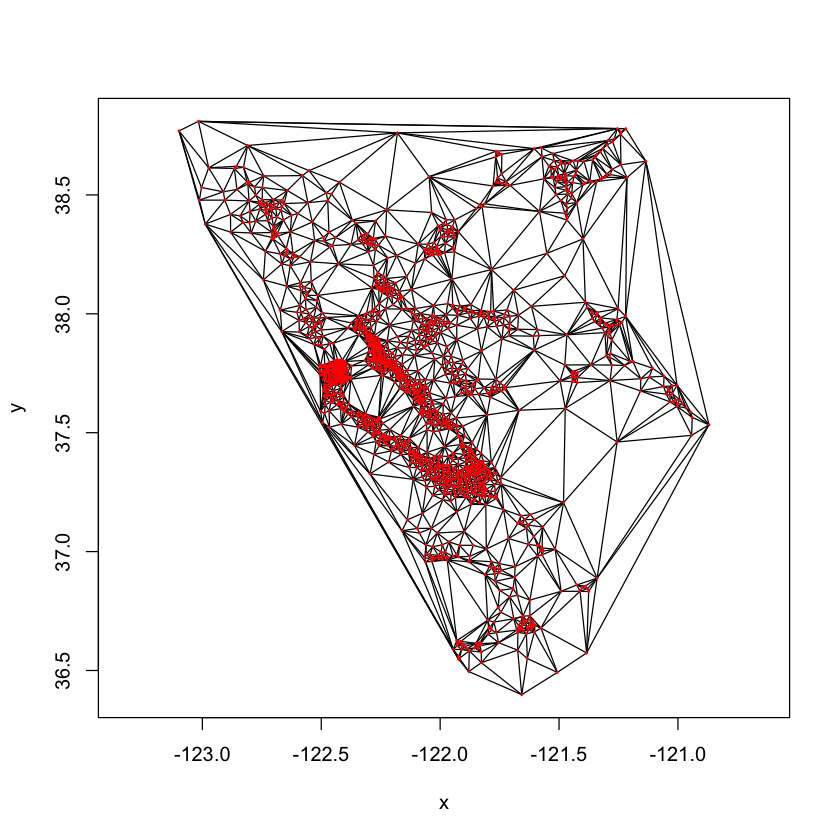

In [45]:
plot(x, y, type = "n", asp = 1)
vtess <- deldir(x, y)
plot(vtess, wlines = "triang", wpoints = "none", number = FALSE, add = TRUE, lty = 1)
points(x, y, pch = 18, col = "red", cex = 0.4)

In [37]:
mat <- cbind(V(gcc)[vtess$delsgs$ind1]$name, V(gcc)[vtess$delsgs$ind2]$name)
g_d <- graph_from_edgelist(mat, directed = FALSE)
print(ecount(g_d))

[1] 5680


# Question 12

In [40]:
eid_c <- c()
flow_c <- c()
time_c <- c()

In [41]:
for(eid in 1:ecount(g_d)){
    v1_name <- V(g_d)[inc(E(g_d)[eid])][1]$name
    v2_name <- V(g_d)[inc(E(g_d)[eid])][2]$name
    if(get.edge.ids(gcc, c(v1_name, v2_name), directed = FALSE) != 0){
        eid_c <- c(eid_c, eid)
        eid <- get.edge.ids(gcc, c(v1_name, v2_name), directed = FALSE)
        location1_a <- V(gcc)[which(V(gcc)$name == v1_name)]$LOCATION[[1]][1]
        location1_l <- V(gcc)[which(V(gcc)$name == v1_name)]$LOCATION[[1]][2]
        location2_a <- V(gcc)[which(V(gcc)$name == v2_name)]$LOCATION[[1]][1]
        location2_l <- V(gcc)[which(V(gcc)$name == v2_name)]$LOCATION[[1]][2]
        distance <- sqrt((location1_a - location2_a)*(location1_a - location2_a) + (location1_l - location2_l)*(location1_l - location2_l))
        speed <- distance * 69.0 /(E(gcc)[eid]$mean_travel_time * 1.0)
        time_c <- c(time_c, E(gcc)[eid]$mean_travel_time)
        flow <- speed * 3600 * 2.0 / (0.003 + 2 * speed)
        print("Route From: ")
        print(v1_name)
        print("Destination: ")
        print(v2_name)
        print("Maximum Flow: ")
        print(flow)
        flow_c <- c(flow_c, flow)
    }
}
# start time 9:08am
# end time 9:51am

[1] "Route From: "
[1] "1170"
[1] "Destination: "
[1] "2110"
[1] "Maximum Flow: "
[1] 2332.962
[1] "Route From: "
[1] "2110"
[1] "Destination: "
[1] "2478"
[1] "Maximum Flow: "
[1] 1775.813
[1] "Route From: "
[1] "1170"
[1] "Destination: "
[1] "2478"
[1] "Maximum Flow: "
[1] 2777.314
[1] "Route From: "
[1] "2110"
[1] "Destination: "
[1] "2015"
[1] "Maximum Flow: "
[1] 3234.326
[1] "Route From: "
[1] "2478"
[1] "Destination: "
[1] "2015"
[1] "Maximum Flow: "
[1] 3121.648
[1] "Route From: "
[1] "2015"
[1] "Destination: "
[1] "2563"
[1] "Maximum Flow: "
[1] 3293.467
[1] "Route From: "
[1] "2563"
[1] "Destination: "
[1] "847"
[1] "Maximum Flow: "
[1] 3465.589
[1] "Route From: "
[1] "2015"
[1] "Destination: "
[1] "847"
[1] "Maximum Flow: "
[1] 3433.133
[1] "Route From: "
[1] "847"
[1] "Destination: "
[1] "1161"
[1] "Maximum Flow: "
[1] 3317.23
[1] "Route From: "
[1] "1445"
[1] "Destination: "
[1] "1444"
[1] "Maximum Flow: "
[1] 3165.848
[1] "Route From: "
[1] "1444"
[1] "Destination: "
[1] 